In [49]:
import Milestone1 
from scipy.signal import butter, lfilter
import numpy as np

# Moving Average Filter
def moving_average_filter(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='valid')

# Low-Pass Filter
def low_pass_filter(signal, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, signal)


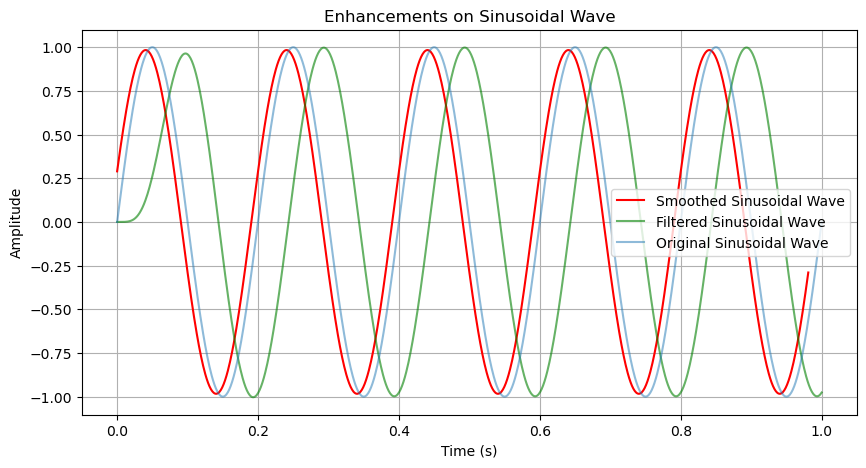

In [115]:
import numpy as np
# Generate a continuous sinusoidal wave
t = np.linspace(0, 1, 1000)  # Time axis
frequency = 5  # Frequency in Hz
amplitude = 1  # Amplitude
sin_wave = amplitude * np.sin(2 * np.pi * frequency * t)

# Apply moving average and low-pass filter to the sinusoidal wave
window_size = 20
smoothed_sin_wave = moving_average_filter(sin_wave, window_size)
filtered_sin_wave = low_pass_filter(sin_wave, cutoff=10, fs=1000, order=4)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t[:len(smoothed_sin_wave)], smoothed_sin_wave, label="Smoothed Sinusoidal Wave", color="red")
plt.plot(t, filtered_sin_wave, label="Filtered Sinusoidal Wave", color="green", alpha=0.6)
plt.plot(t, sin_wave, label="Original Sinusoidal Wave", alpha=0.5)
plt.title("Enhancements on Sinusoidal Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


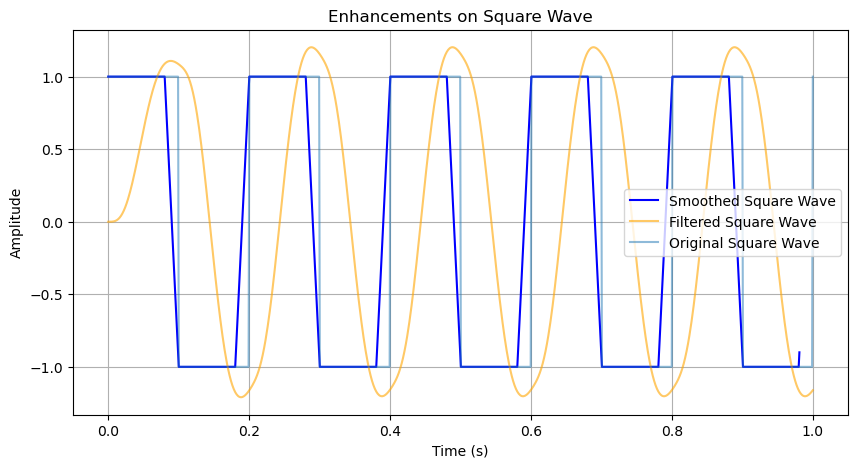

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# Generate a continuous square wave
square_wave = amplitude * square(2 * np.pi * frequency * t)

# Apply moving average and low-pass filter to the square wave
smoothed_square_wave = moving_average_filter(square_wave, window_size)
filtered_square_wave = low_pass_filter(square_wave, cutoff=10, fs=1000, order=4)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t[:len(smoothed_square_wave)], smoothed_square_wave, label="Smoothed Square Wave", color="blue")
plt.plot(t, filtered_square_wave, label="Filtered Square Wave", color="orange", alpha=0.6)
plt.plot(t, square_wave, label="Original Square Wave", alpha=0.5)
plt.title("Enhancements on Square Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

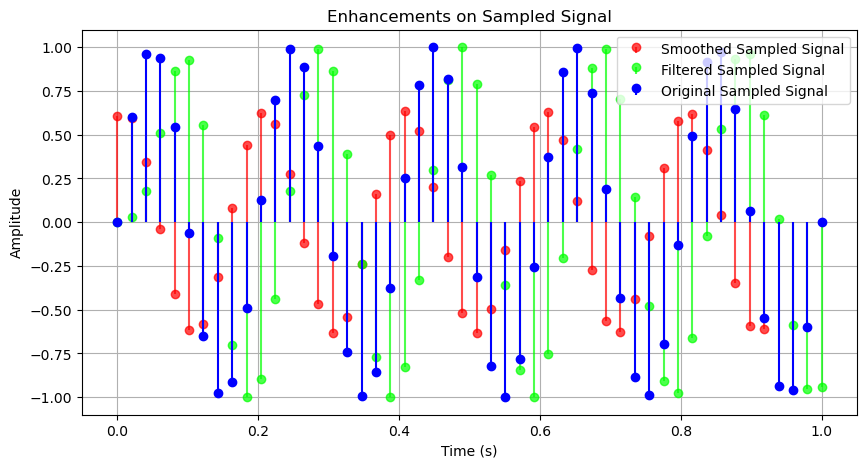

In [105]:
# Plot
plt.figure(figsize=(10, 5))
plt.stem(
    truncated_sampled_t,
    smoothed_sampled_wave,
    linefmt=(1, 0, 0, 0.7),  # Red with transparency (RGBA)
    markerfmt=(1, 0, 0, 0.7),  # Red markers with transparency
    basefmt=" ",
    label="Smoothed Sampled Signal"
)
plt.stem(
    filtered_truncated_t,
    filtered_sampled_wave,
    linefmt=(0, 1, 0, 0.7),  # Green with transparency (RGBA)
    markerfmt=(0, 1, 0, 0.7),  # Green markers with transparency
    basefmt=" ",
    label="Filtered Sampled Signal"
)
plt.stem(
    sampled_t,
    sampled_wave,
    linefmt="b-",  # Solid blue line
    markerfmt="bo",  # Solid blue markers
    basefmt=" ",
    label="Original Sampled Signal"
)
plt.title("Enhancements on Sampled Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


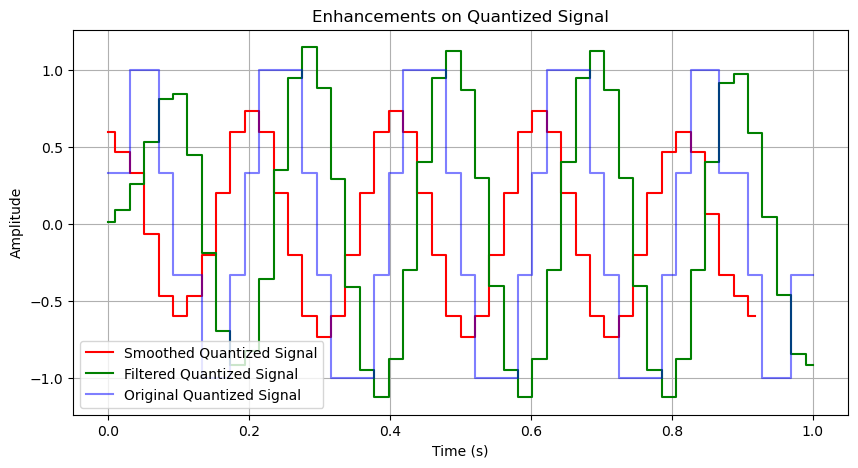

In [107]:

# Quantized Signal
quantization_levels = 4
min_val = np.min(sampled_wave)
max_val = np.max(sampled_wave)
quantized_wave = np.round((sampled_wave - min_val) / (max_val - min_val) * (quantization_levels - 1))
quantized_wave = quantized_wave / (quantization_levels - 1) * (max_val - min_val) + min_val

# Apply moving average and low-pass filter to the quantized signal
smoothed_quantized_wave = moving_average_filter(quantized_wave, window_size=5)
filtered_quantized_wave = low_pass_filter(quantized_wave, cutoff=10, fs=50, order=4)

# Plot
plt.figure(figsize=(10, 5))
plt.step(sampled_t[:len(smoothed_quantized_wave)], smoothed_quantized_wave, where="mid", color="red", label="Smoothed Quantized Signal")
plt.step(sampled_t, filtered_quantized_wave, where="mid", color="green", label="Filtered Quantized Signal")
plt.step(sampled_t, quantized_wave, where="mid", color="blue", label="Original Quantized Signal", alpha=0.5)
plt.title("Enhancements on Quantized Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


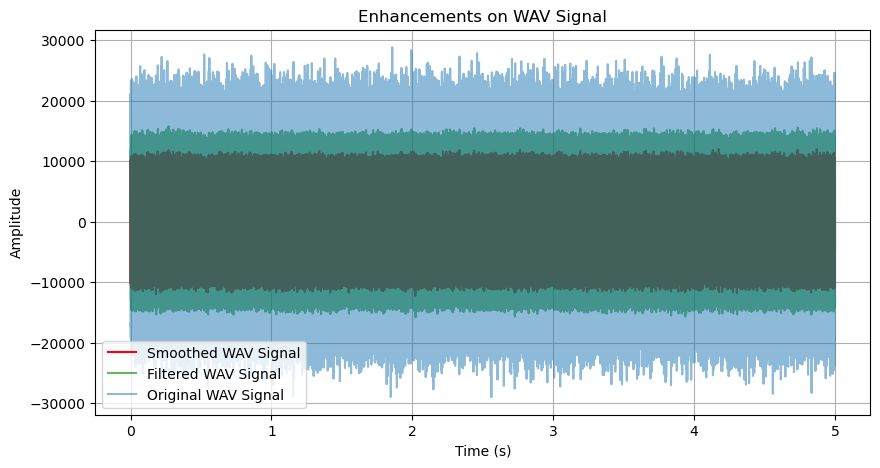

In [113]:
from scipy.io.wavfile import read
# Load WAV Signal
sampling_rate, data = read(r"C:\Users\ibrah\Documents\synthetic_audio_signal.wav")
if len(data.shape) > 1:
    data = data[:, 0]  # Use first channel if stereo

# Time Axis
duration = len(data) / sampling_rate
time = np.linspace(0., duration, len(data))

# Moving Average
smoothed_wav_signal = moving_average_filter(data, window_size=50)

# Low-Pass Filter
# Apply low-pass filter correctly with all parameters
filtered_wav_signal = low_pass_filter(data, cutoff=500, fs=sampling_rate, order=4)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time[:len(smoothed_wav_signal)], smoothed_wav_signal, label="Smoothed WAV Signal", color="red")
plt.plot(time, filtered_wav_signal, label="Filtered WAV Signal", color="green", alpha=0.6)
plt.plot(time, data, label="Original WAV Signal", alpha=0.5)
plt.title("Enhancements on WAV Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


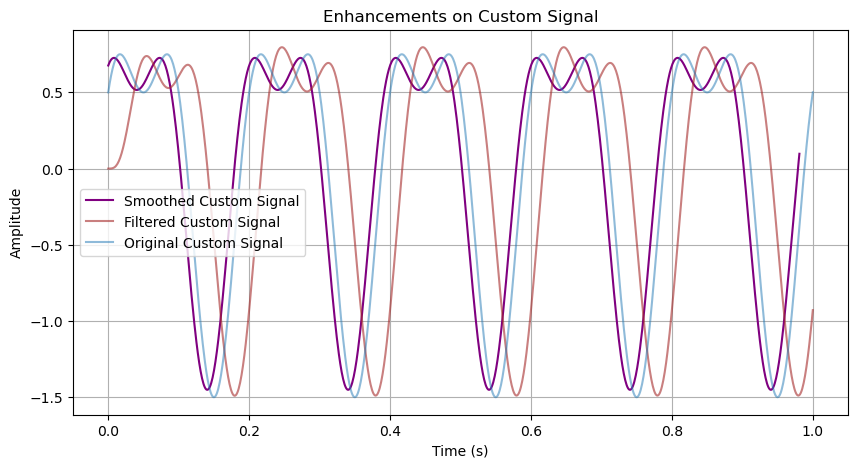

In [111]:
# Custom Signal
A = 1  # Amplitude of sine wave
B = 0.5  # Amplitude of cosine wave
f1 = 5  # Frequency of sine wave (Hz)
f2 = 10  # Frequency of cosine wave (Hz)
duration = 1  # Duration of the signal in seconds
sampling_rate = 1000  # Sampling rate (samples per second)
t = np.linspace(0, duration, int(sampling_rate * duration))
custom_signal = A * np.sin(2 * np.pi * f1 * t) + B * np.cos(2 * np.pi * f2 * t)

# Apply moving average and low-pass filter to the custom signal
smoothed_custom_signal = moving_average_filter(custom_signal, window_size)
filtered_custom_signal = low_pass_filter(custom_signal, cutoff=15, fs=sampling_rate, order=4)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t[:len(smoothed_custom_signal)], smoothed_custom_signal, label="Smoothed Custom Signal", color="purple")
plt.plot(t, filtered_custom_signal, label="Filtered Custom Signal", color="brown", alpha=0.6)
plt.plot(t, custom_signal, label="Original Custom Signal", alpha=0.5)
plt.title("Enhancements on Custom Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()